<a href="https://colab.research.google.com/github/younus1082/Automated-Detection-of-PCOS-and-Ovarian-Cysts-using-CNNs/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 STARTING ULTIMATE SHOWCASE...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset ready.
📊 Loading Validation Images...
Found 6876 files belonging to 5 classes.
Using 1375 files for validation.

🧠 Loading Model from: /content/drive/MyDrive/My_Ovary_Project/ovarian_cyst_model.h5...


✅ Model Loaded Successfully!

📝 Generating Scientific Test Report (Confusion Matrix)...


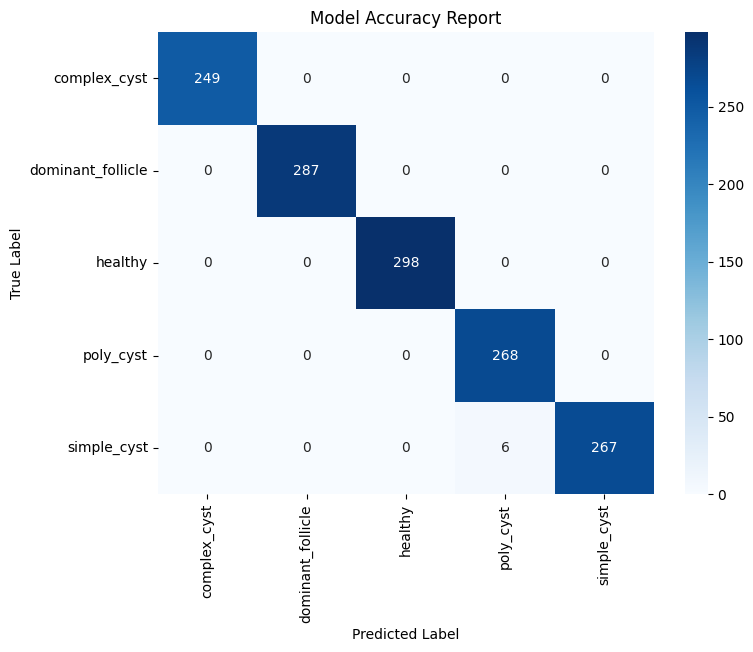


--- Detailed Accuracy Stats ---
                   precision    recall  f1-score   support

     complex_cyst       1.00      1.00      1.00       249
dominant_follicle       1.00      1.00      1.00       287
          healthy       1.00      1.00      1.00       298
        poly_cyst       0.98      1.00      0.99       268
      simple_cyst       1.00      0.98      0.99       273

         accuracy                           1.00      1375
        macro avg       1.00      1.00      1.00      1375
     weighted avg       1.00      1.00      1.00      1375


👁️ RUNNING VISUAL SANITY CHECK...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


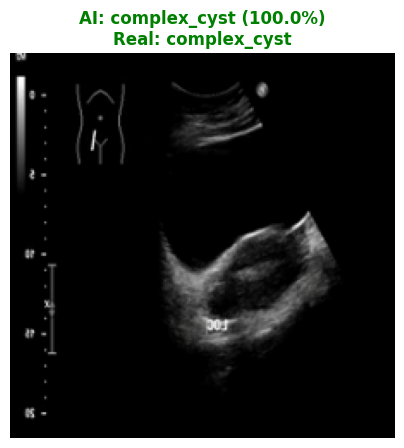


✨ LIVE DEMO READY ✨
Upload an ultrasound image to test:


Saving img3.jpg_aug_3.jpg to img3.jpg_aug_3 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


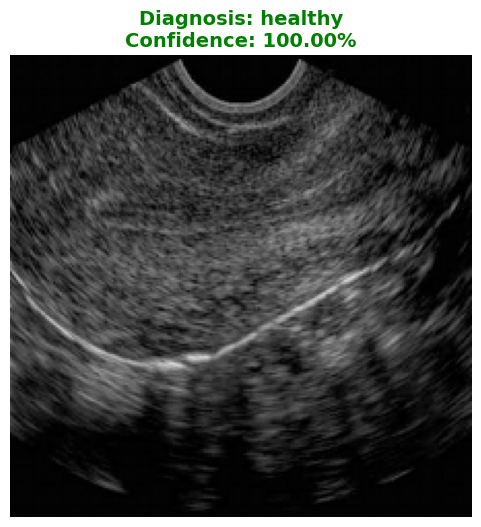

In [4]:
import os
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from google.colab import files
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

# ==========================================
# PART 1: SETUP & DATA LOADING
# ==========================================
print("🚀 STARTING ULTIMATE SHOWCASE...")
drive.mount('/content/drive')

# 1. Unzip Data (Needed for the Test Report)
zip_path = '/content/drive/MyDrive/My_Ovary_Project/archive.zip'
extract_path = '/content/dataset'

if not os.path.exists(extract_path):
    print("📂 Unzipping dataset for testing...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print("✅ Dataset ready.")

# 2. Load ONLY Validation Data (We don't need Training data for a demo)
print("📊 Loading Validation Images...")
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
base_dir = '/content/dataset/Ovarian_US'

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
class_names = val_ds.class_names

# ==========================================
# PART 2: LOAD SAVED BRAIN
# ==========================================
model_path = '/content/drive/MyDrive/My_Ovary_Project/ovarian_cyst_model.h5'
print(f"\n🧠 Loading Model from: {model_path}...")
try:
    model = tf.keras.models.load_model(model_path)
    print("✅ Model Loaded Successfully!")
except:
    print("❌ Error: Model not found. Please train and save it first.")

# ==========================================
# PART 3: GENERATE TEST REPORT
# ==========================================
print("\n📝 Generating Scientific Test Report (Confusion Matrix)...")
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))

# Plot Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Model Accuracy Report')
plt.show()

print("\n--- Detailed Accuracy Stats ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# ==========================================
# PART 4: SANITY CHECK (Visual Internal Test)
# ==========================================
print("\n👁️ RUNNING VISUAL SANITY CHECK...")
# Pick a random image from the internal dataset
for images, labels in val_ds.shuffle(1000).take(1):
    sample_image = images[0].numpy().astype("uint8")
    true_label = class_names[labels[0]]

    # Predict
    img_array = tf.expand_dims(images[0], 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    predicted_label = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Display
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image)
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"AI: {predicted_label} ({confidence:.1f}%)\nReal: {true_label}",
              color=color, fontweight='bold')
    plt.axis("off")
    plt.show()

# ==========================================
# PART 5: LIVE DEMO (Upload)
# ==========================================
print("\n✨ LIVE DEMO READY ✨")
print("Upload an ultrasound image to test:")
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_batch)
    score = tf.nn.softmax(predictions[0])

    predicted_label = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    color = 'green' if confidence > 90 else 'blue'
    plt.title(f"Diagnosis: {predicted_label}\nConfidence: {confidence:.2f}%",
              color=color, fontsize=14, fontweight='bold')
    plt.show()